<a href="https://colab.research.google.com/github/preetmodi/Credit-Risk-Analytics/blob/main/Woe_calculation_P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!sudo echo -ne '\n' | sudo add-apt-repository ppa:alessandro-strada/ppa >/dev/null 2>&1 # note: >/dev/null 2>&1 is used to supress printing
!sudo apt update >/dev/null 2>&1
!sudo apt install google-drive-ocamlfuse >/dev/null 2>&1
!google-drive-ocamlfuse
!sudo apt-get install w3m >/dev/null 2>&1 # to act as web browser 
!xdg-settings set default-web-browser w3m.desktop >/dev/null 2>&1 # to set default browser 
%cd /content
!mkdir gdrive
%cd gdrive
!mkdir "My Drive"
!google-drive-ocamlfuse "/content/gdrive/My Drive"

Access token retrieved correctly.
/content
mkdir: cannot create directory ‘gdrive’: File exists
/content/gdrive
mkdir: cannot create directory ‘My Drive’: File exists


In [3]:
!pip install git+https://github.com/CBravoR/scorecardpy
# !pip uninstall scorecardpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/CBravoR/scorecardpy to /tmp/pip-req-build-x3q1yoov
  Running command git clone --filter=blob:none --quiet https://github.com/CBravoR/scorecardpy /tmp/pip-req-build-x3q1yoov
  Resolved https://github.com/CBravoR/scorecardpy to commit 03ec28470391e5c950580ad9ac4877ca33f05fce
  Preparing metadata (setup.py) ... done
  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.3-py3-none-any.whl size=59549 sha256=519f1d5286f2ca4ea496dec783bbf3e28d97528d7eea93d1591065a32facc123
  Stored in directory: /tmp/pip-ephem-wheel-cache-2hb7zt5e/wheels/61/36/7f/76fa329f36d896910f2251f5cfd54094c722e088b633e47f6f
Successfully built scorecardpy


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scorecardpy as sc
%matplotlib inline

In [5]:
%cd /content/gdrive/My Drive/Data/
# df = pd.read_csv("transformed_data.csv", low_memory=False, index_col=0)

/content/gdrive/My Drive/Data


## TO be added in Data Cleaning

In [21]:
# To have everything except id
# df = df.iloc[:,1:]
# df = df.drop(columns = ['funded_amnt', 'funded_amnt_inv'])

# df['mths_since_recent_inq'][df['mths_since_recent_inq'] == 0] = 0.5
# df['mths_since_recent_inq'] = 1/df['mths_since_recent_inq']
# df['mths_since_recent_inq'] = df['mths_since_recent_inq'].fillna(0)

In [22]:

# train, test = sc.split_df(df.iloc[:,1:],
#                           y = 'Default',
#                           ratio = 0.7,
#                           seed = 251256517).values()

In [6]:
# train.to_csv('Train.csv')
# test.to_csv('Test.csv')
train = pd.read_csv("train_median.csv", low_memory=False, index_col=0)
# test = pd.read_csv("Test.csv", low_memory=False, index_col=0)


In [7]:
train['Default']

0          0
1          0
5          0
6          1
8          0
          ..
1280640    1
1280641    0
1280643    0
1280644    1
1280645    0
Name: Default, Length: 896430, dtype: int64

In [8]:
train_last_19 = train.iloc[:, 38:]
train_last_19.columns

Index(['inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy',
       'bc_util', 'chargeoff_within_12_mths', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
       'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit',
       'Default', 'bank_dlq', 'il_acc', 'payment_history',
       'collateral_coverage_ratio'],
      dtype='object')

In [58]:
0

1800000000.0

In [78]:
def outlier_analysis(df):
  df.loc[df["num_il_tl"]>50,"num_il_tl"] = 50
  df.loc[df["num_op_rev_tl"]>35,"num_op_rev_tl"] = 35
  df.loc[df["num_rev_accts"]>60,"num_rev_accts"] = 60
  df.loc[df["num_rev_tl_bal_gt_0"]>30,"num_rev_tl_bal_gt_0"] = 30
  df.loc[df["num_sats"]>40,"num_sats"] = 40
  df.loc[df["pct_tl_nvr_dlq"]<50,"pct_tl_nvr_dlq"] = 50
  df.loc[df["pub_rec_bankruptcies"]>2,"pub_rec_bankruptcies"] = 2
  df.loc[df["tax_liens"]>15,"tax_liens"] = 15
  df.loc[df["tot_hi_cred_lim"]>0.18e+7,"tot_hi_cred_lim"] = 0.18e+7
  df.loc[df["total_bal_ex_mort"]>0.6e+6,"total_bal_ex_mort"] = 0.6e+6
  df.loc[df["total_bc_limit"]>200000,"total_bc_limit"] = 200000
  df.loc[df["total_il_high_credit_limit"]>0.4e+6,"total_il_hi_credit_limit"] = 0.4e+6
  df.loc[df["coborrower_inc"]>0.2e+6,"coborrower_inc"] = 0.2e+6
  df.loc[df["payment_history"]<-0.3,"payment_history"] = -0.3
  df.loc[df["collateral_coverage_ratio"]>50,"collateral_coverage_ratio"] = 50

  return df

In [79]:
after_outliers = outlier_analysis(train_last_19)

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)
<ipython-input-9-9384d646ae1d>:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data = train_last_19, x = col_id, hue = "Default", kind = 'kde')


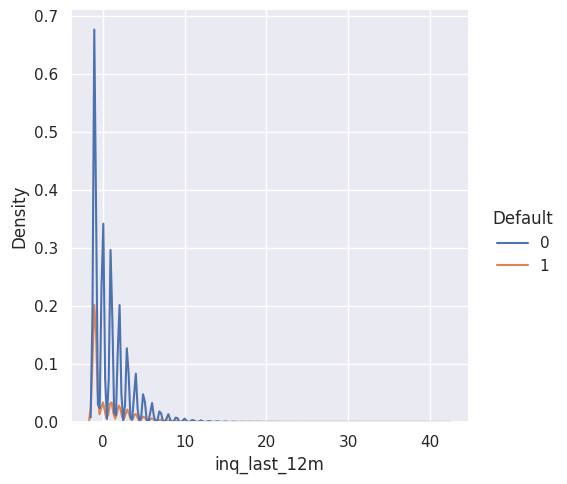

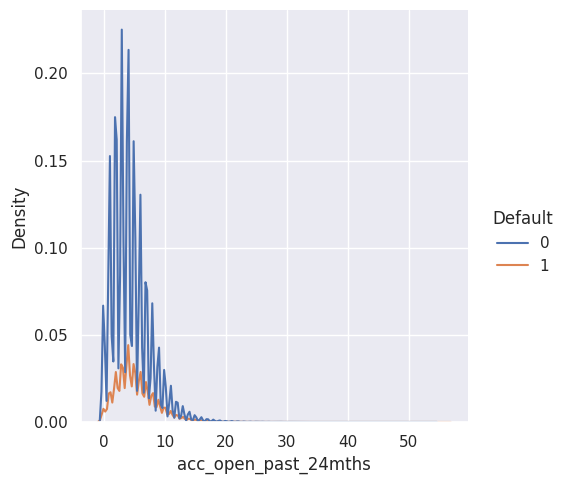

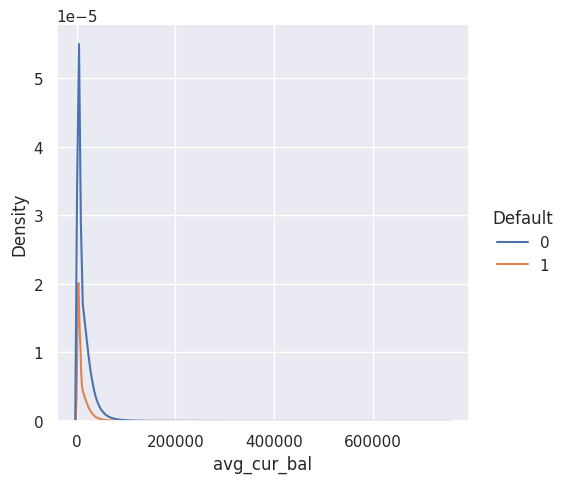

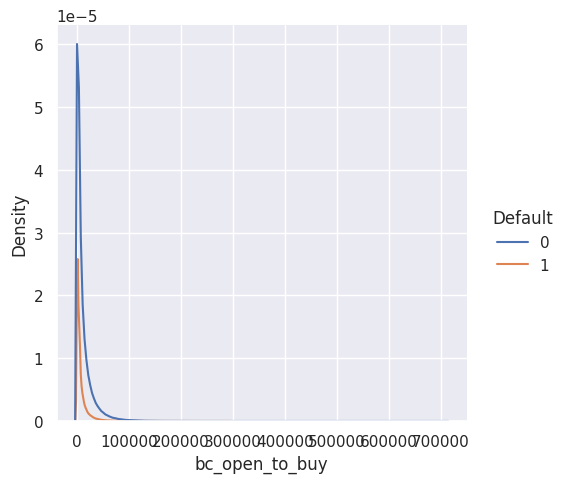

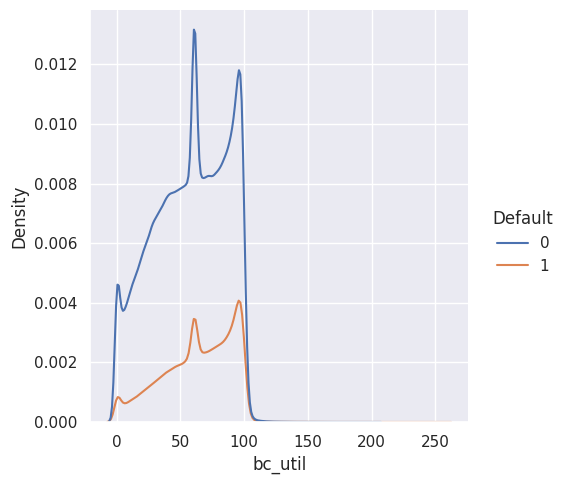

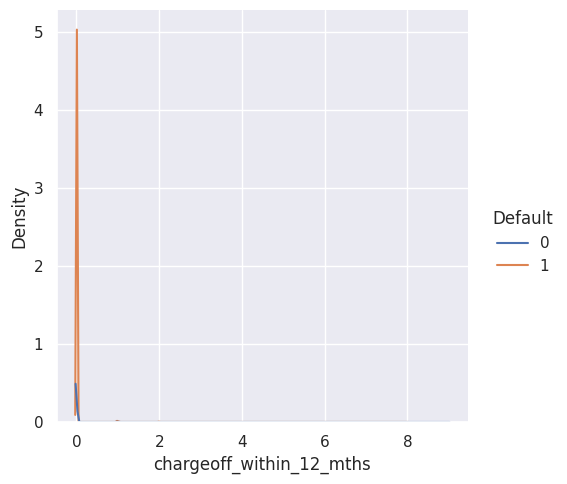

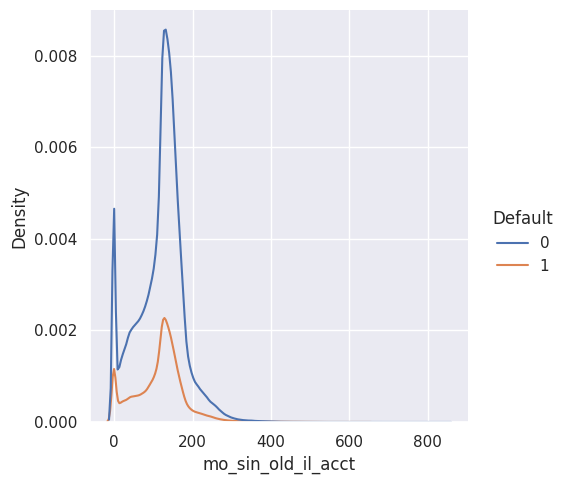

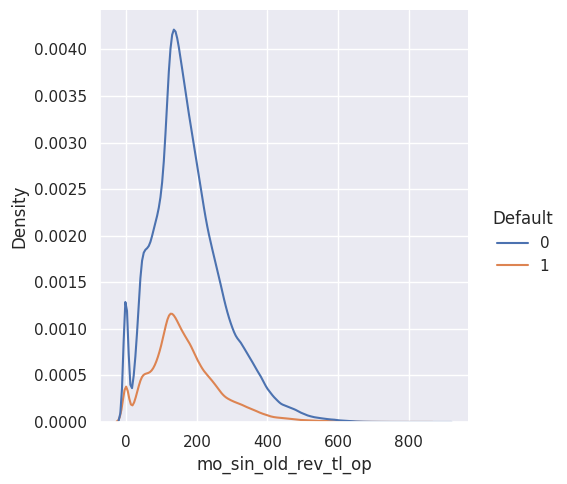

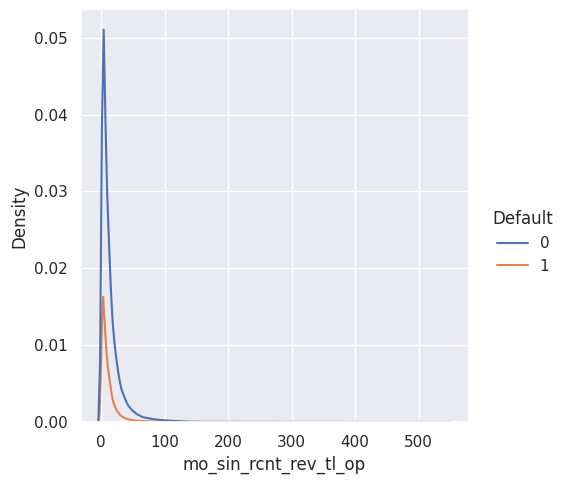

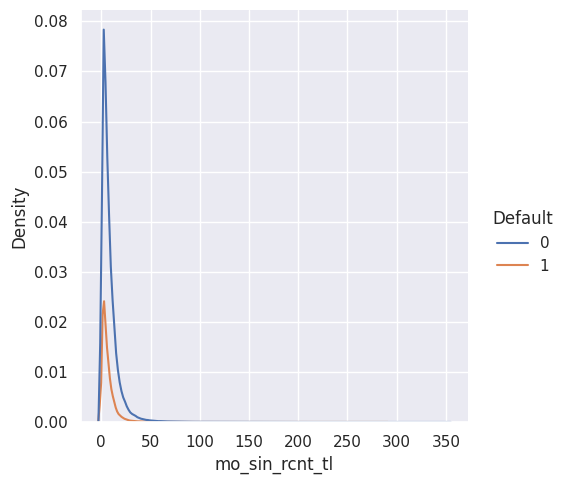

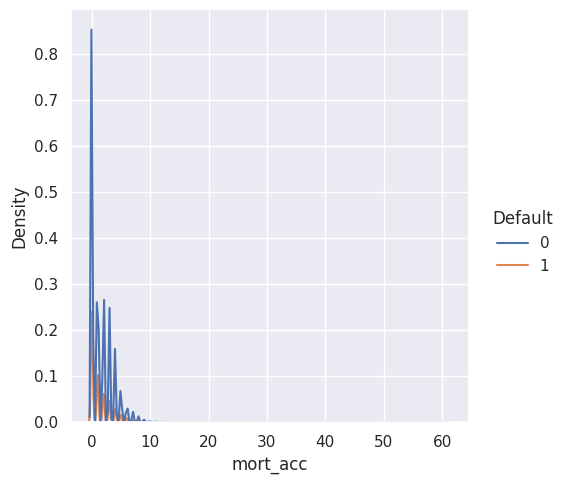

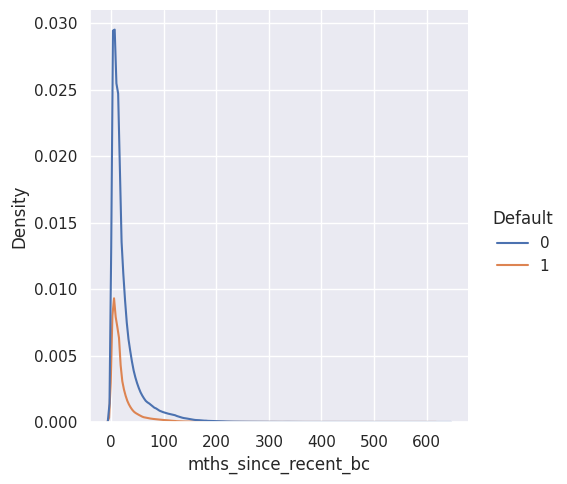

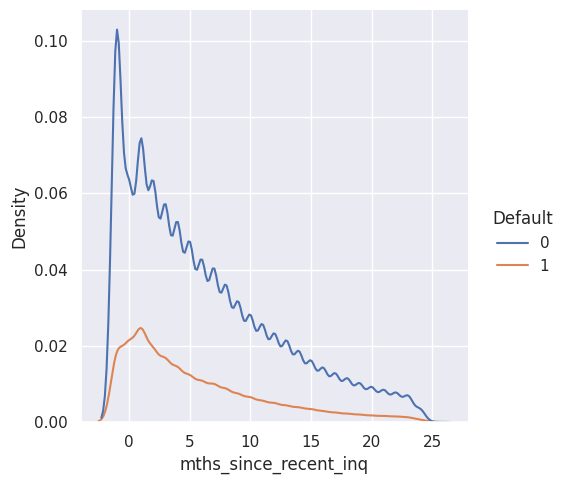

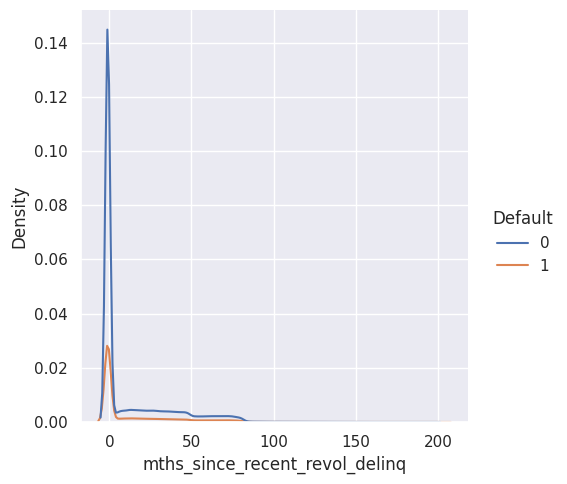

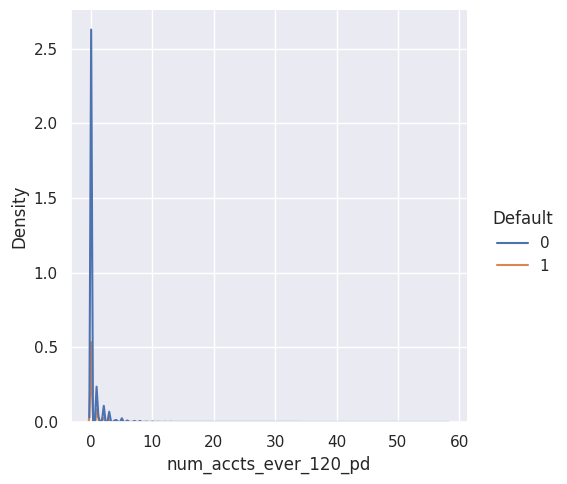

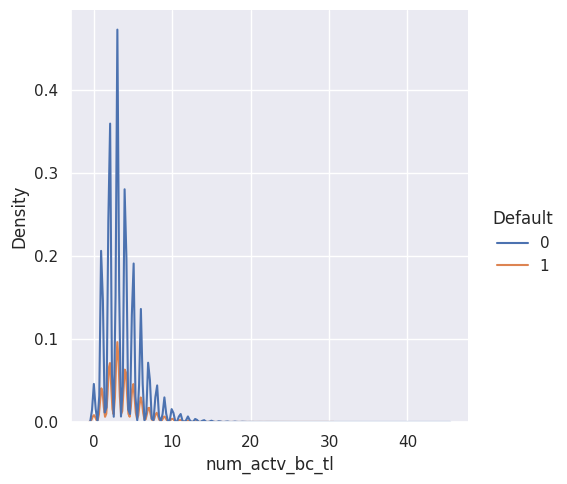

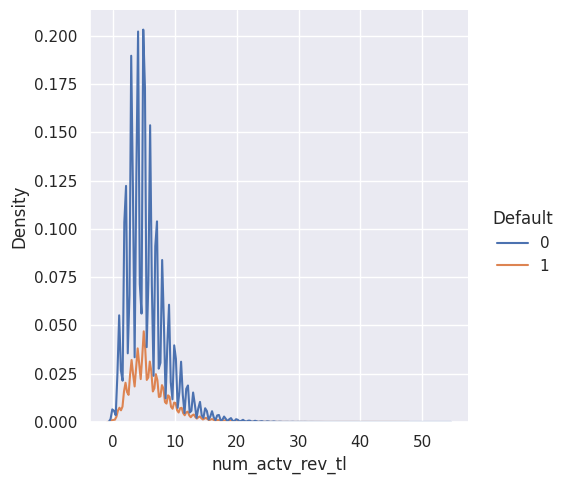

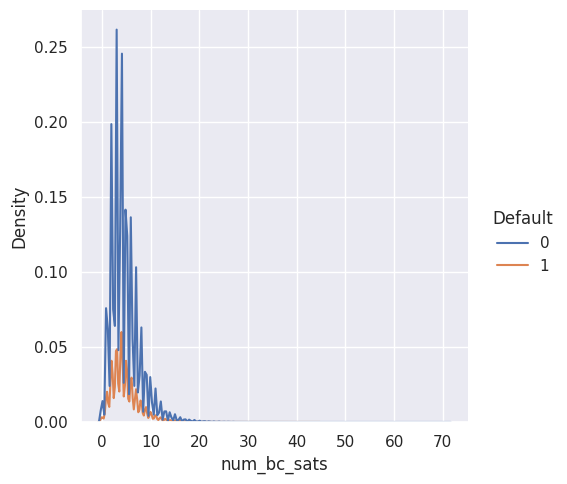

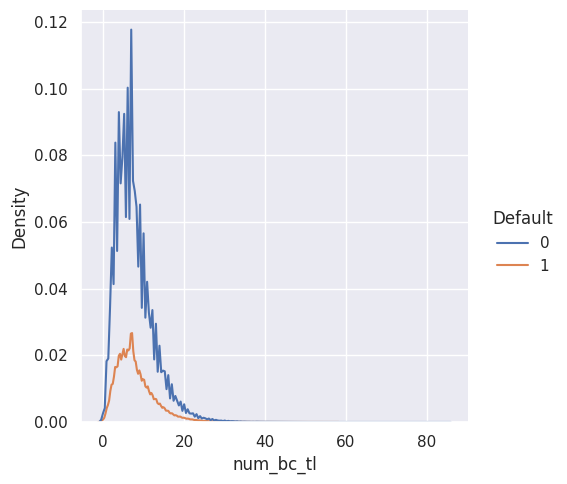

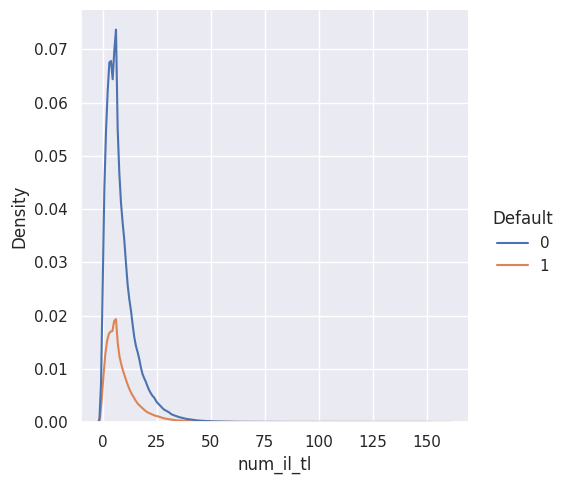

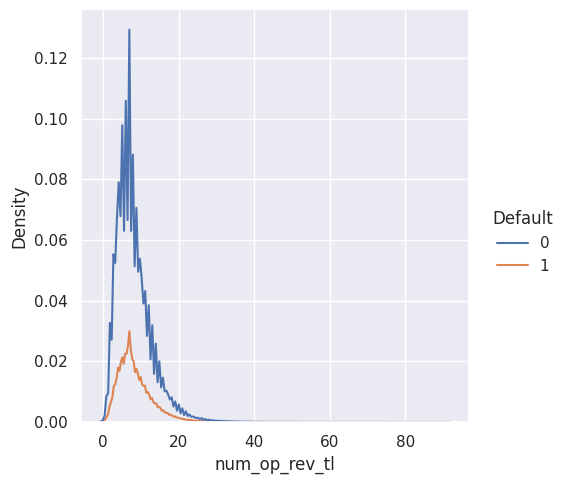

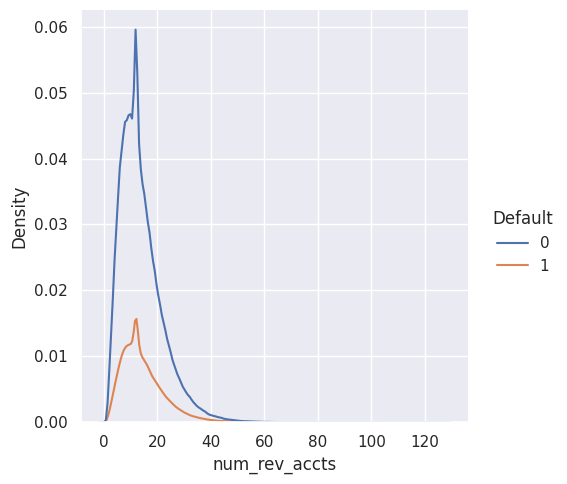

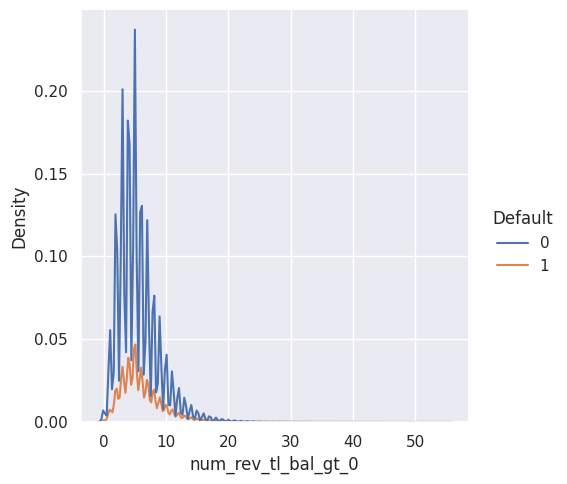

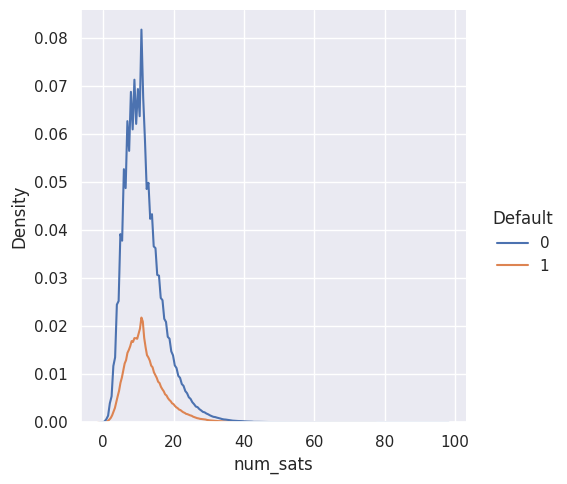

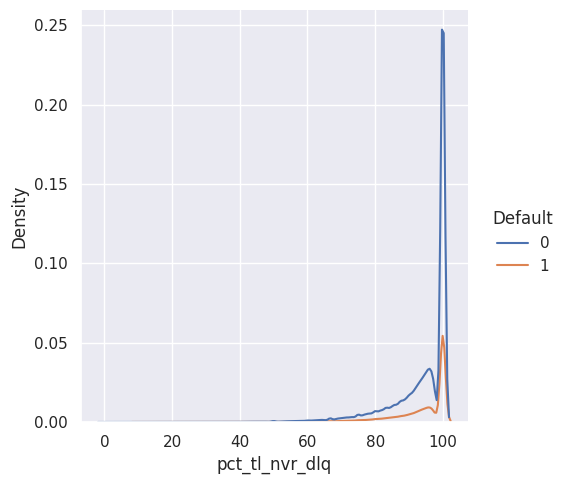

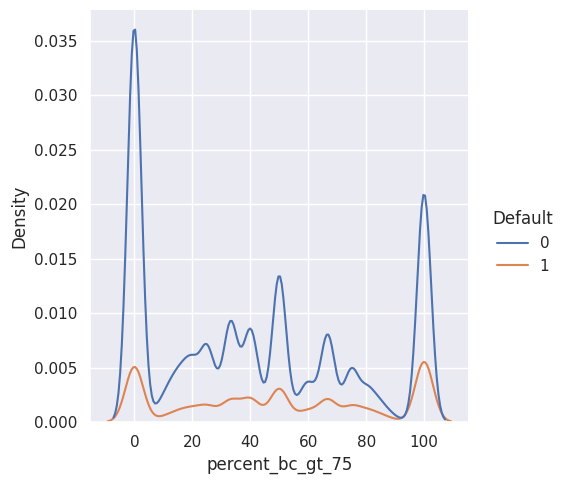

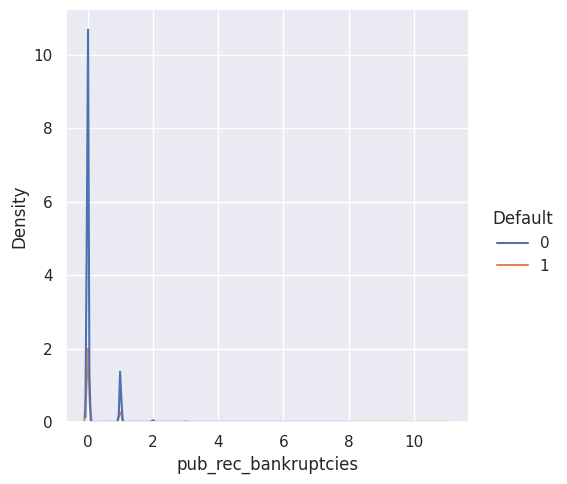

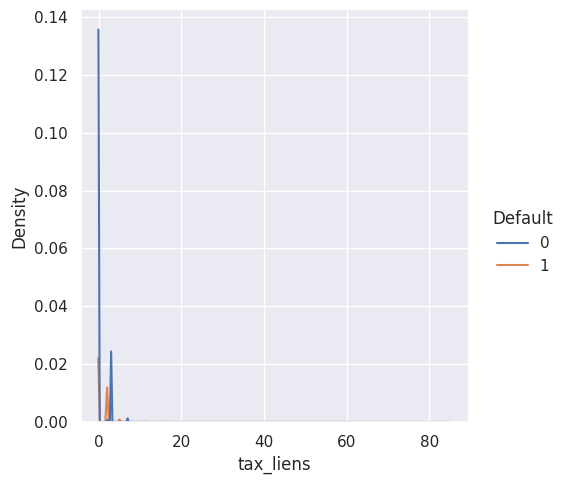

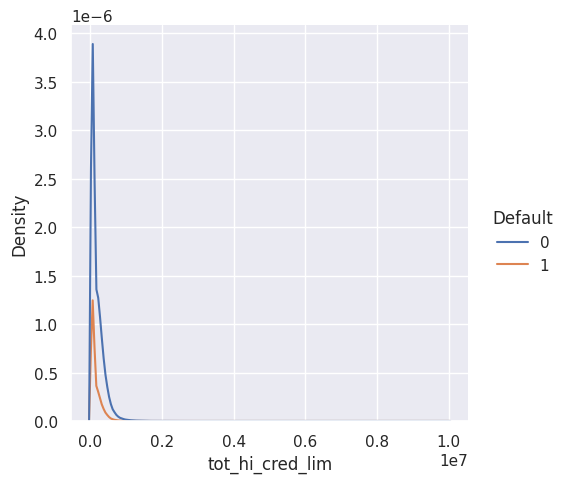

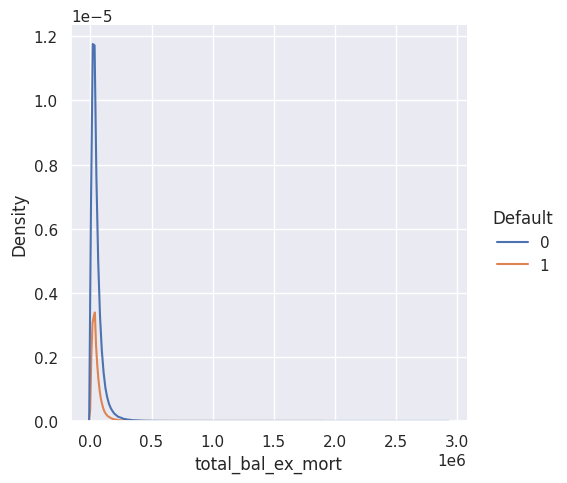

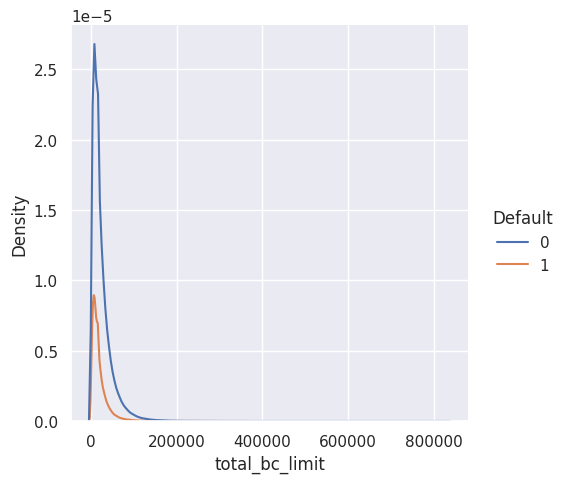

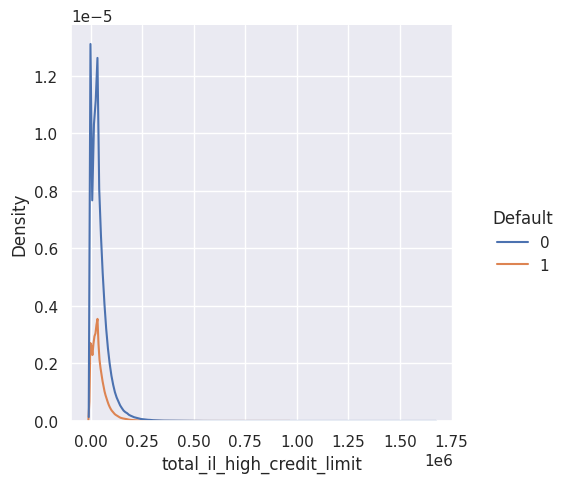

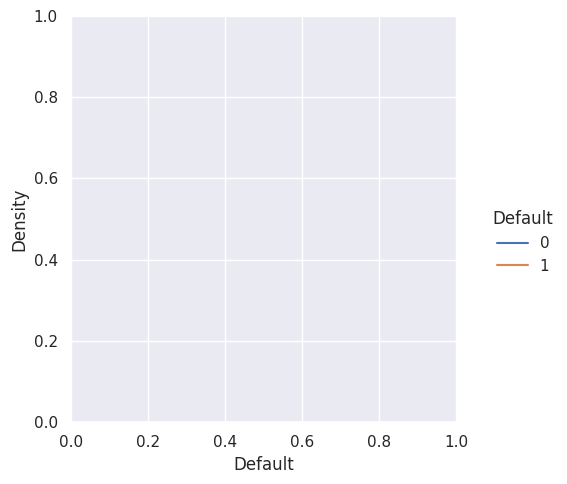

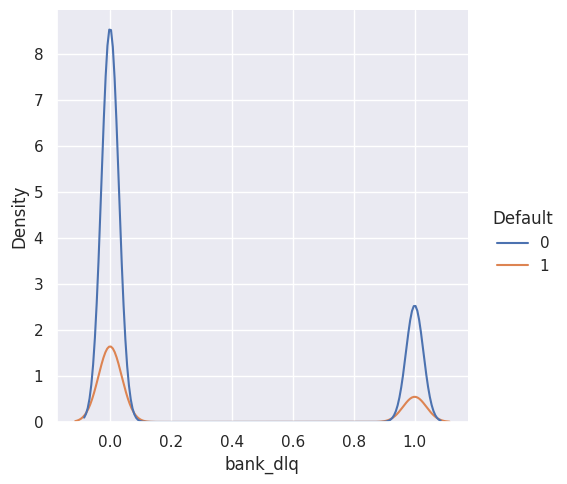

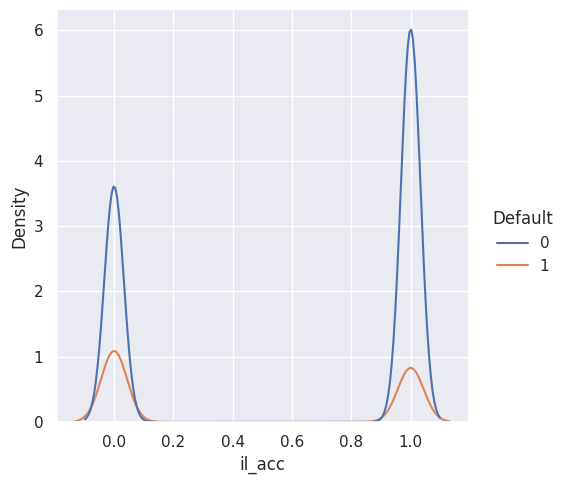

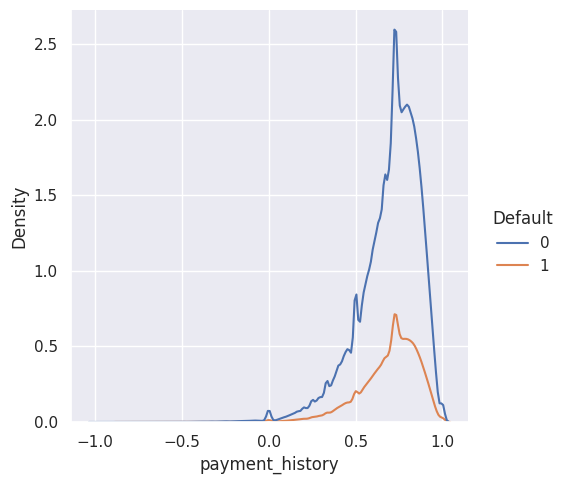

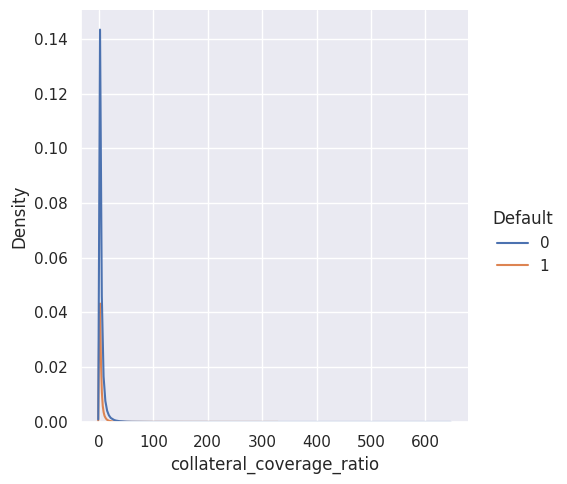

In [9]:
sns.set(color_codes=True)

for col_id in train_last_19.columns:
    sns.displot(data = train_last_19, x = col_id, hue = "Default", kind = 'kde')

In [10]:
# train_last_19 = train.iloc[:,38:]
# train_last_19['Default']
# ['Default'] = train['Default']
# train.Default = train.Default.astype(float)
# train.bank_dlq = train.bank_dlq.astype(float)
# train.il_acc = train.il_acc.astype(float)
train.dtypes

id                             int64
loan_amnt                    float64
funded_amnt                  float64
funded_amnt_inv              float64
term                          object
                              ...   
Default                        int64
bank_dlq                       int64
il_acc                         int64
payment_history              float64
collateral_coverage_ratio    float64
Length: 75, dtype: object

In [14]:
train['num_rev_accts']

0          27.0
2           3.0
6          19.0
8          11.0
10          9.0
           ... 
1280637    14.0
1280638     7.0
1280641    21.0
1280643    37.0
1280644    24.0
Name: num_rev_accts, Length: 848276, dtype: float64

In [11]:
# train_last_19 = train.iloc[:, 38:] #.drop(columns=['num_rev_accts', 'percent_bc_gt_75'])
# train_last_19['Default'] = train['Default']
# train_last_19[]
# bins = []
# for column in train_last_19.columns:
#     temp = train_last_19[column].to_frame()
#     temp['Default'] = train['Default']
bins = sc.woebin(train_last_19, y = 'Default', 
                min_perc_fine_bin=0.01, # How many bins to cut initially into
                min_perc_coarse_bin=0.02,  # Minimum percentage per final bin
                stop_limit=0.02, # Minimum information value 
                max_num_bin=10, # Maximum number of bins
                method='tree'
                )
        

[INFO] creating woe binning ...
Binning on 896430 rows and 37 columns in 00:02:46


/usr/local/lib/python3.9/dist-packages/scorecardpy/woebin.py:1225: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax1 = plt.subplots()


{'collateral_coverage_ratio': <Figure size 640x480 with 2 Axes>,
 'bc_util': <Figure size 640x480 with 2 Axes>,
 'num_op_rev_tl': <Figure size 640x480 with 2 Axes>,
 'pub_rec_bankruptcies': <Figure size 640x480 with 2 Axes>,
 'mths_since_recent_inq': <Figure size 640x480 with 2 Axes>,
 'payment_history': <Figure size 640x480 with 2 Axes>,
 'total_il_high_credit_limit': <Figure size 640x480 with 2 Axes>,
 'num_actv_bc_tl': <Figure size 640x480 with 2 Axes>,
 'avg_cur_bal': <Figure size 640x480 with 2 Axes>,
 'tot_hi_cred_lim': <Figure size 640x480 with 2 Axes>,
 'mo_sin_rcnt_rev_tl_op': <Figure size 640x480 with 2 Axes>,
 'num_actv_rev_tl': <Figure size 640x480 with 2 Axes>,
 'acc_open_past_24mths': <Figure size 640x480 with 2 Axes>,
 'bank_dlq': <Figure size 640x480 with 2 Axes>,
 'mo_sin_old_il_acct': <Figure size 640x480 with 2 Axes>,
 'num_rev_tl_bal_gt_0': <Figure size 640x480 with 2 Axes>,
 'mort_acc': <Figure size 640x480 with 2 Axes>,
 'total_bc_limit': <Figure size 640x480 with

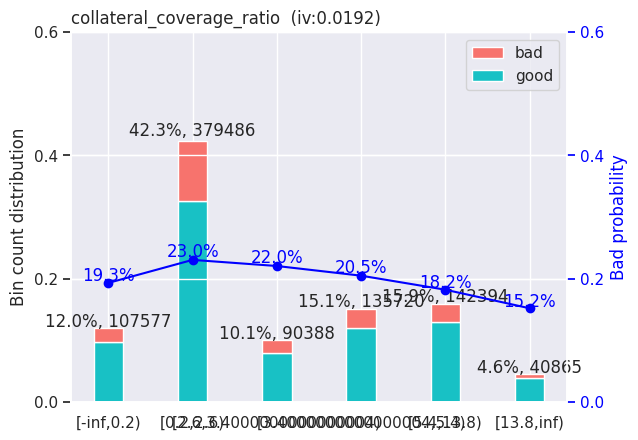

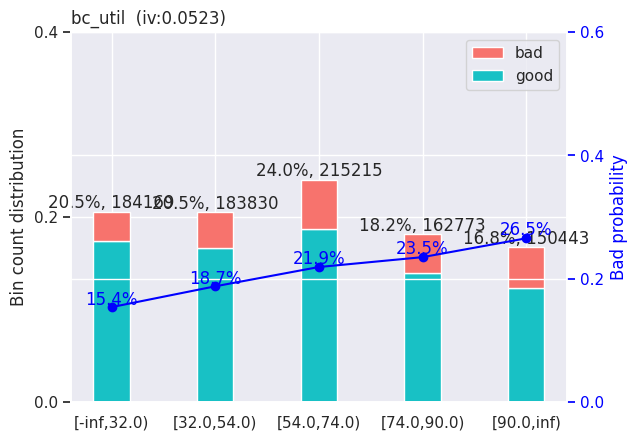

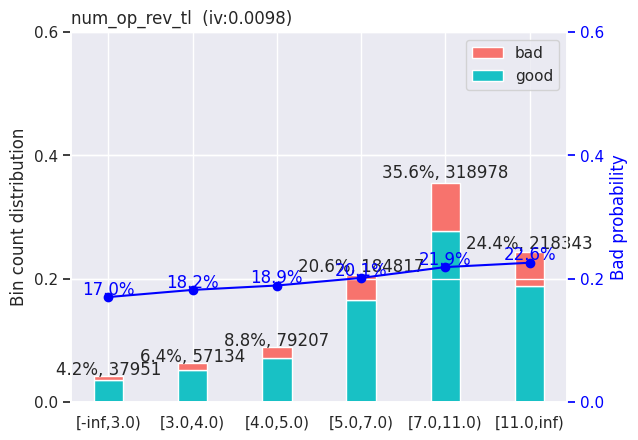

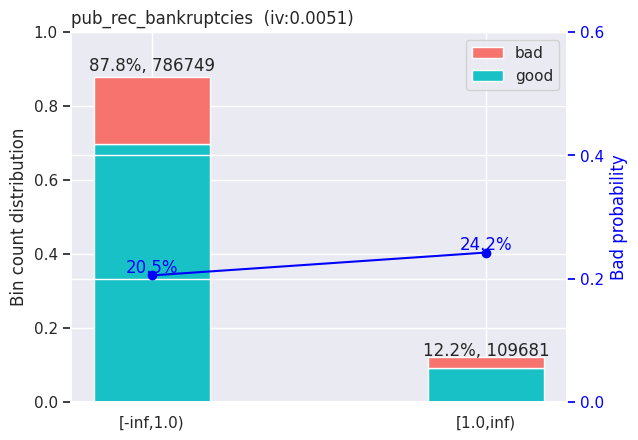

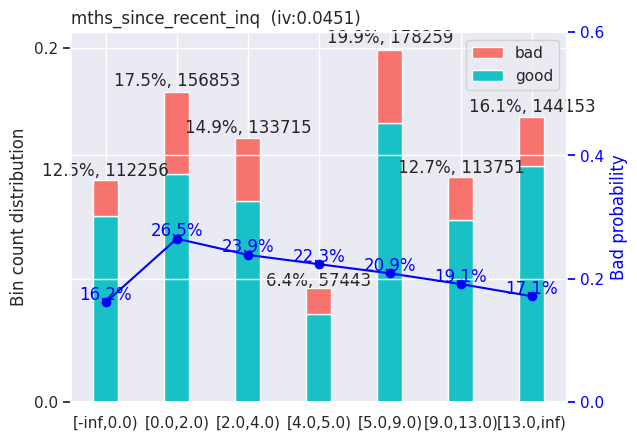

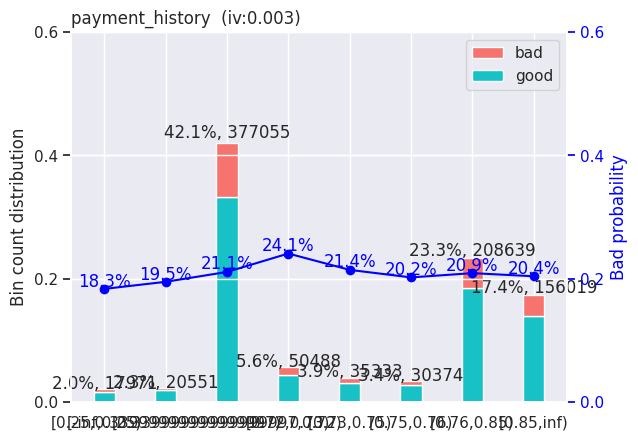

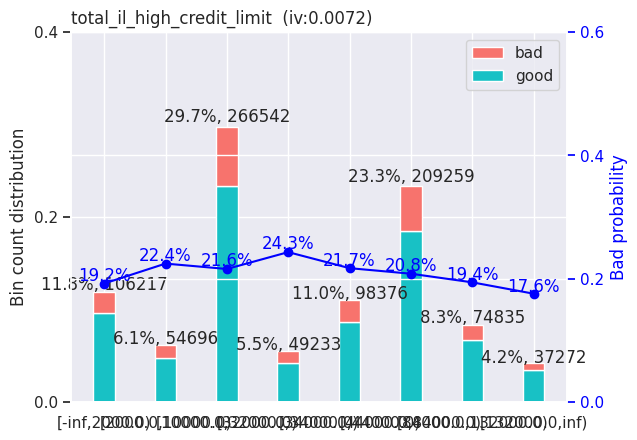

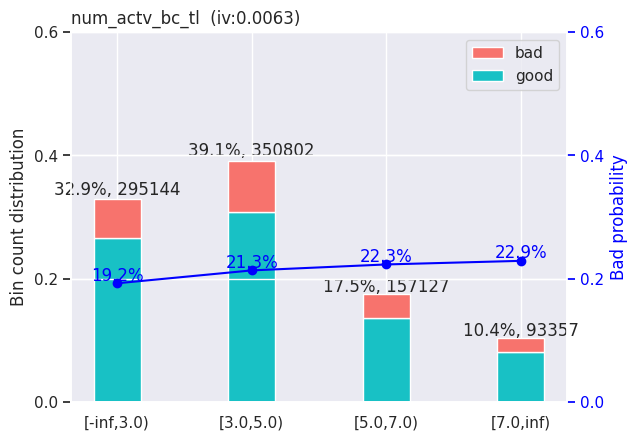

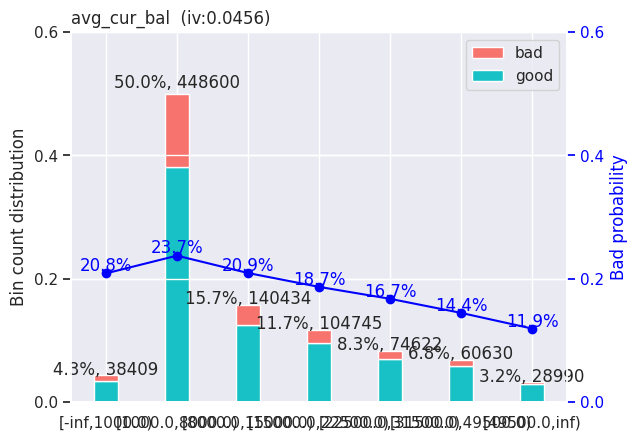

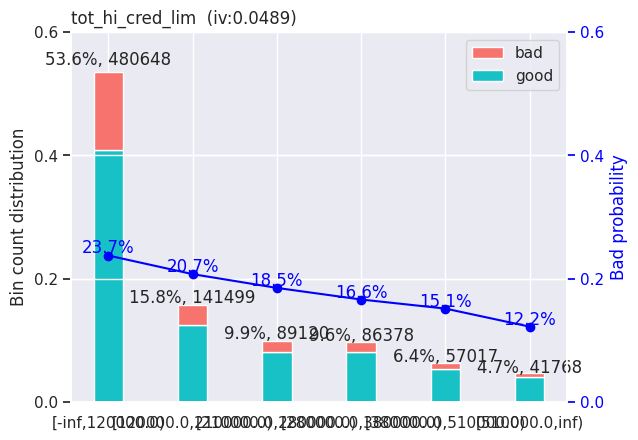

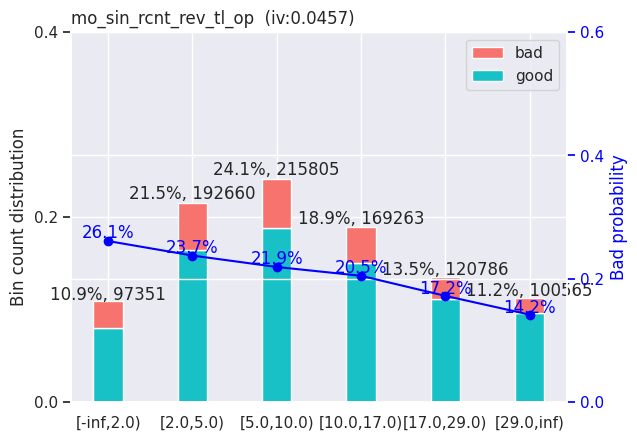

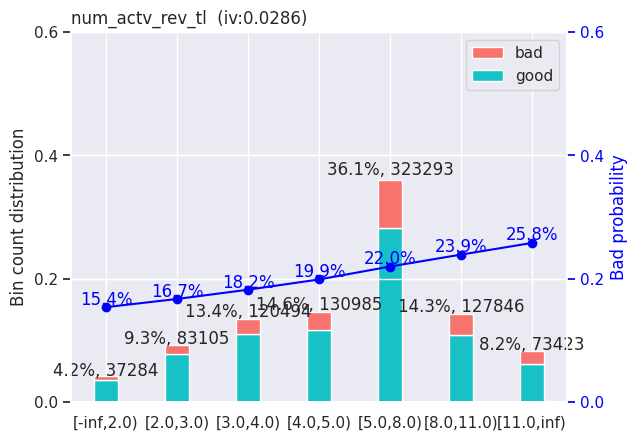

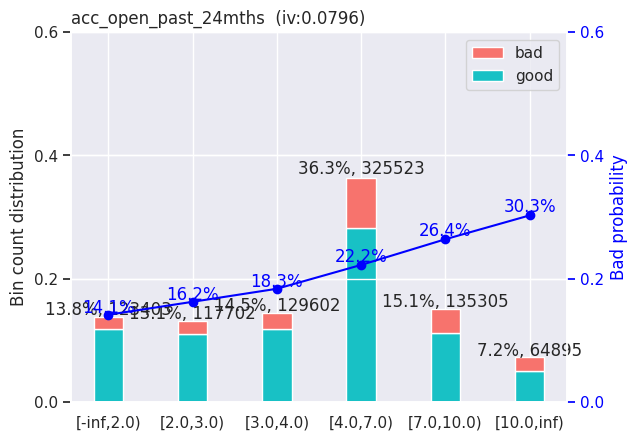

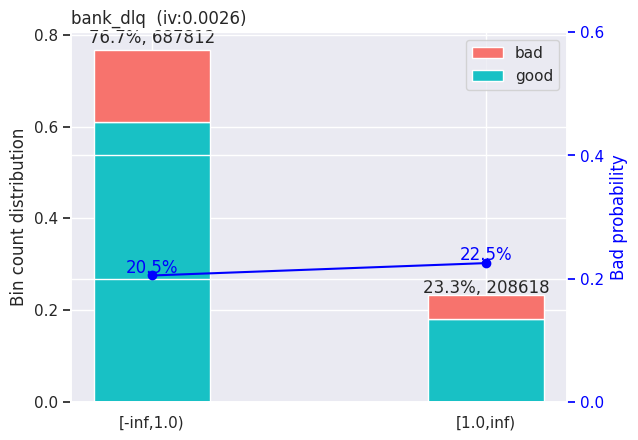

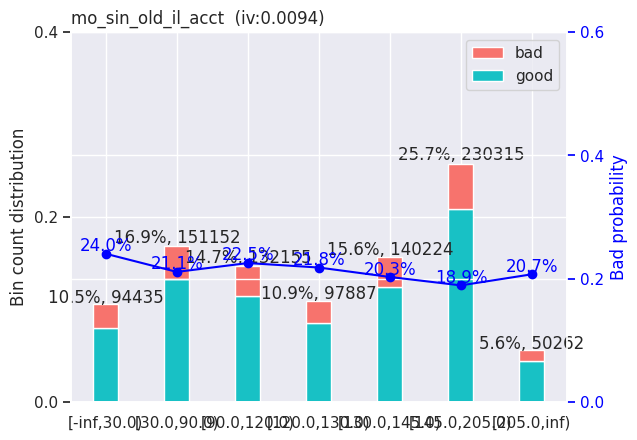

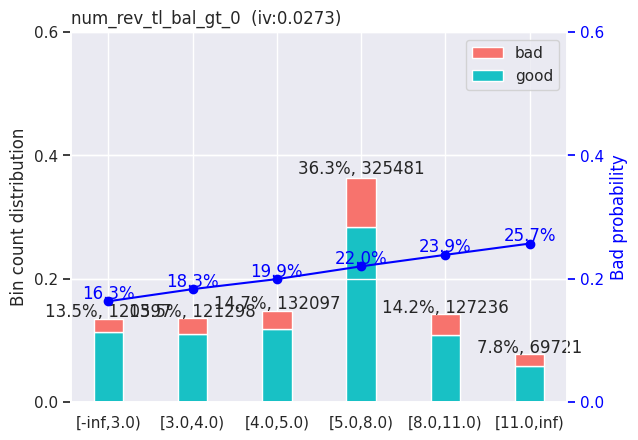

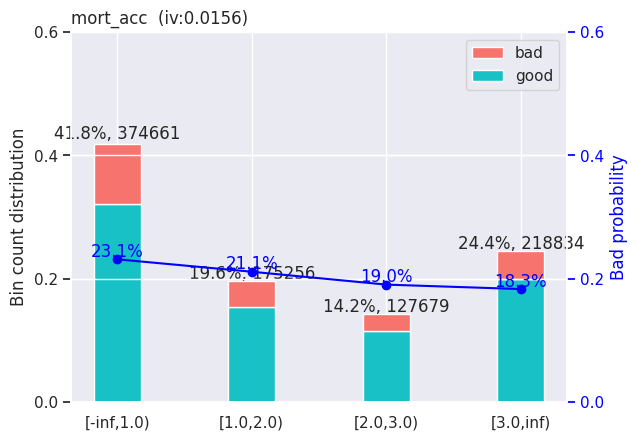

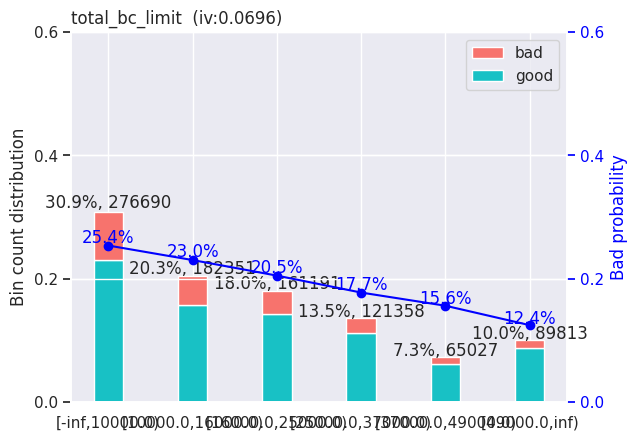

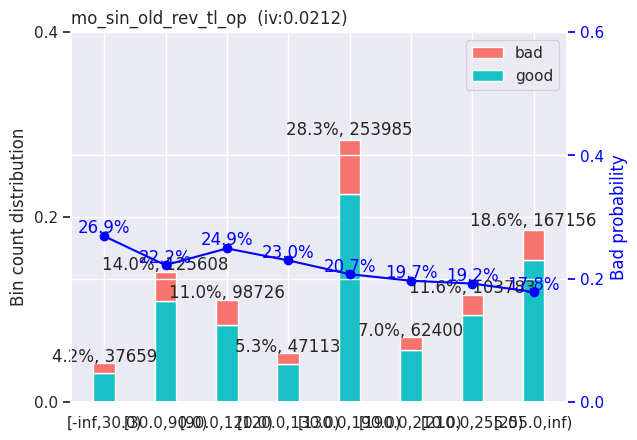

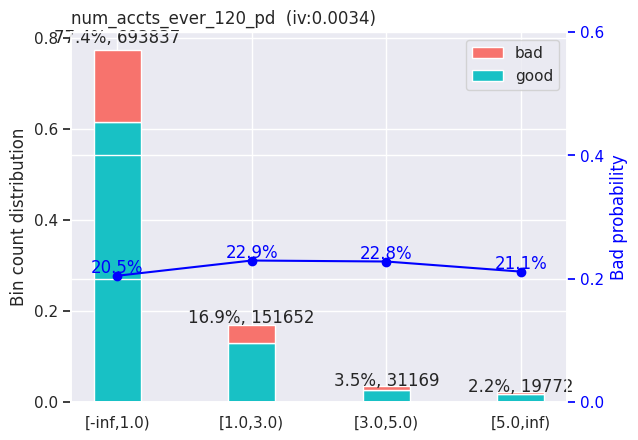

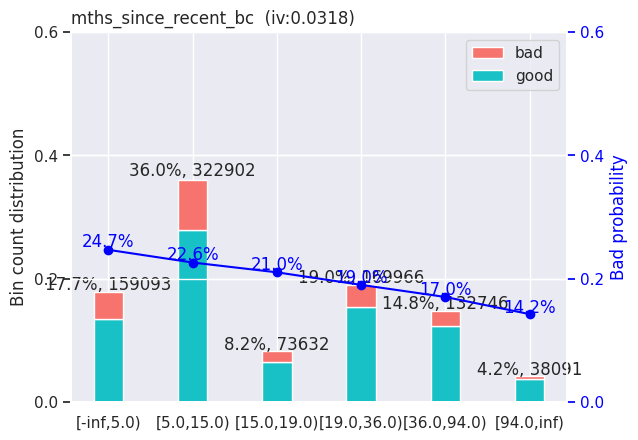

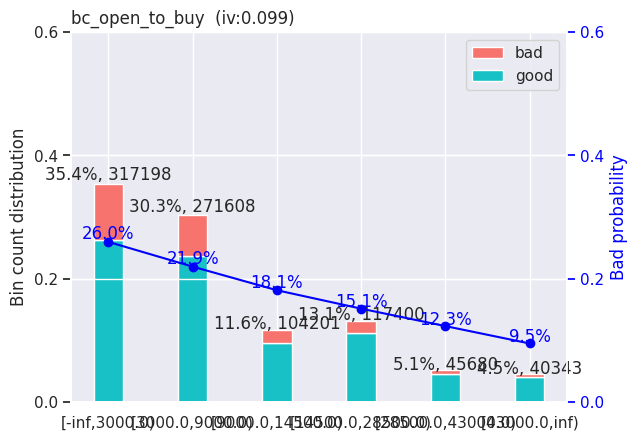

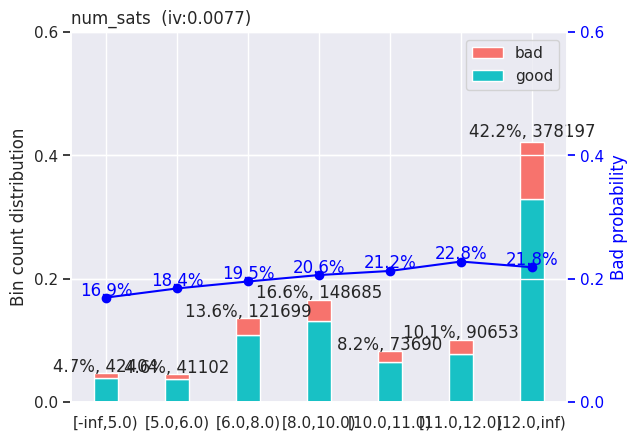

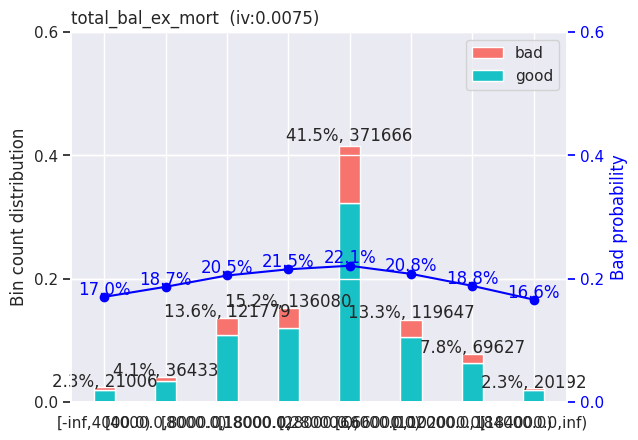

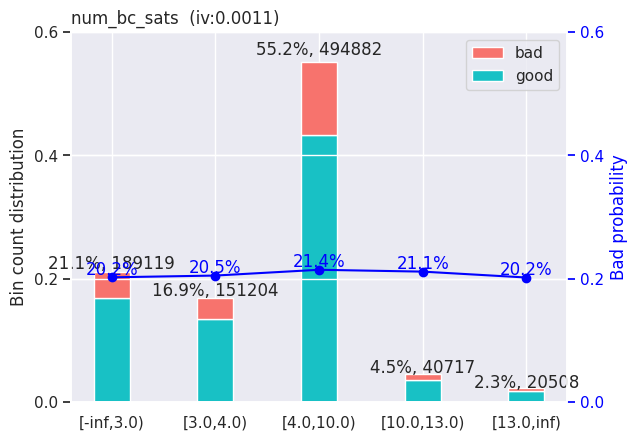

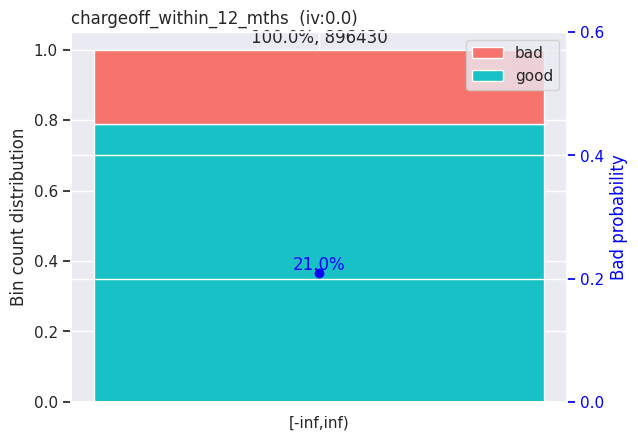

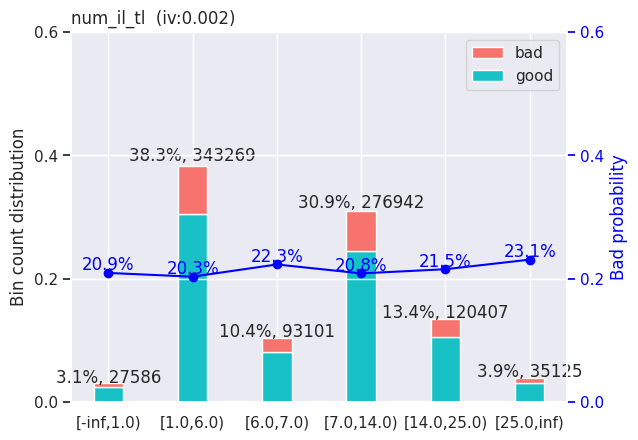

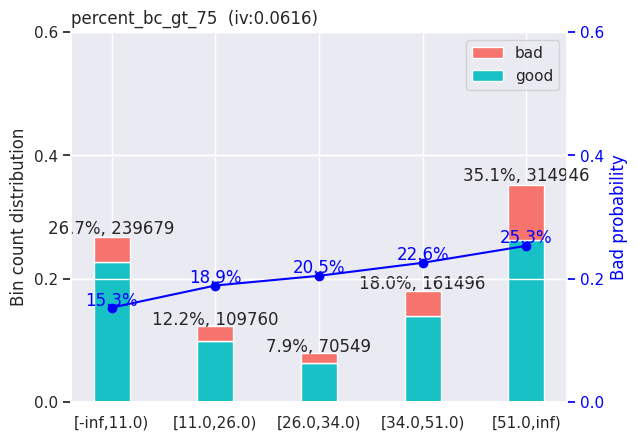

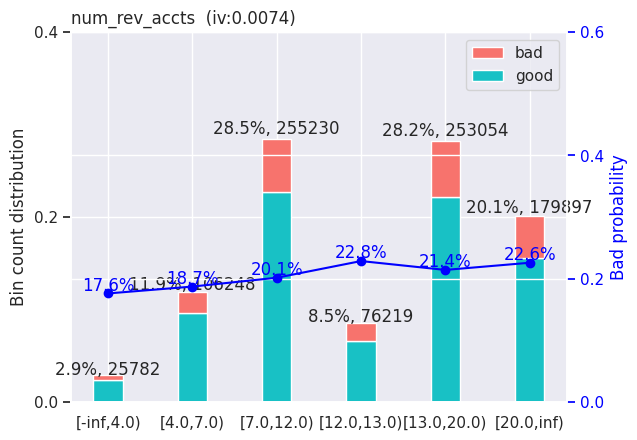

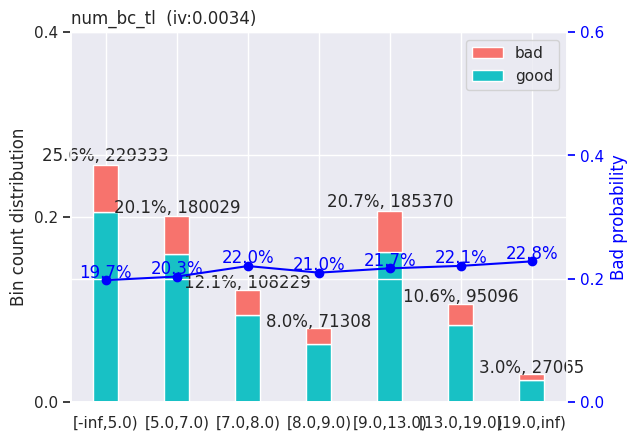

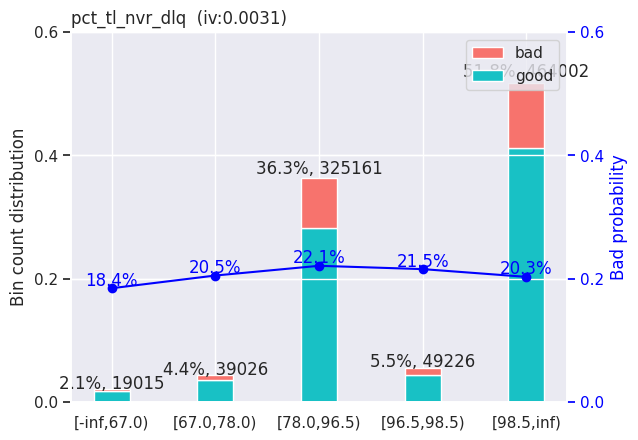

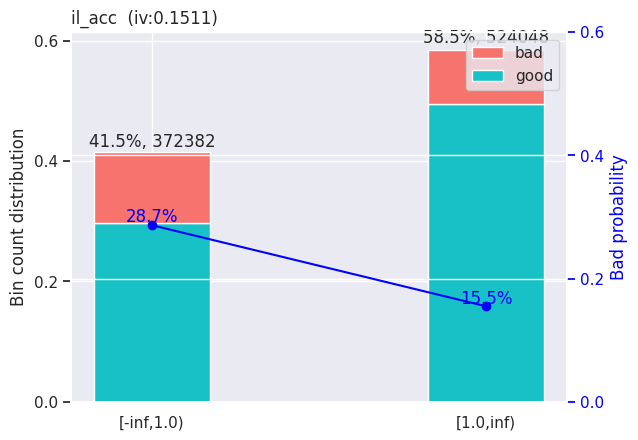

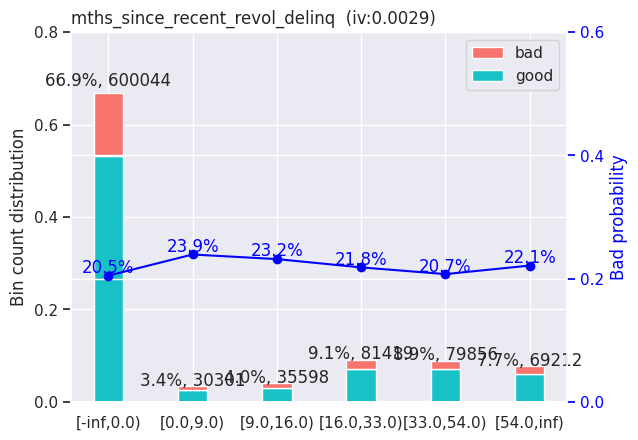

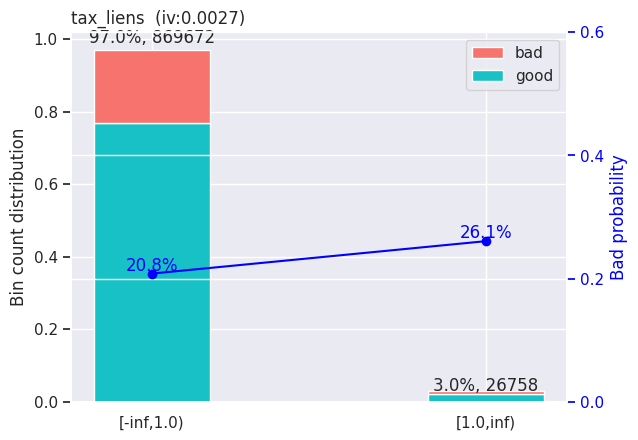

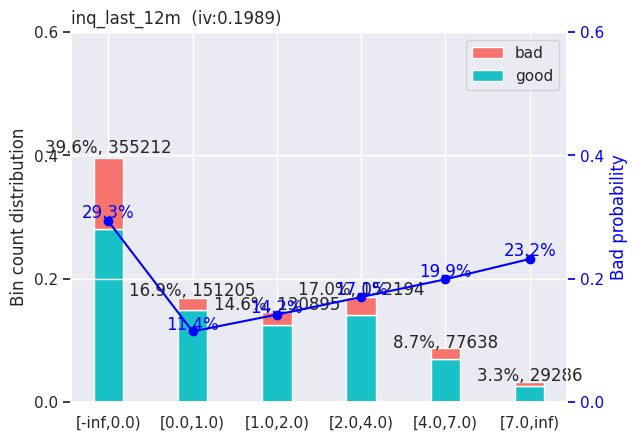

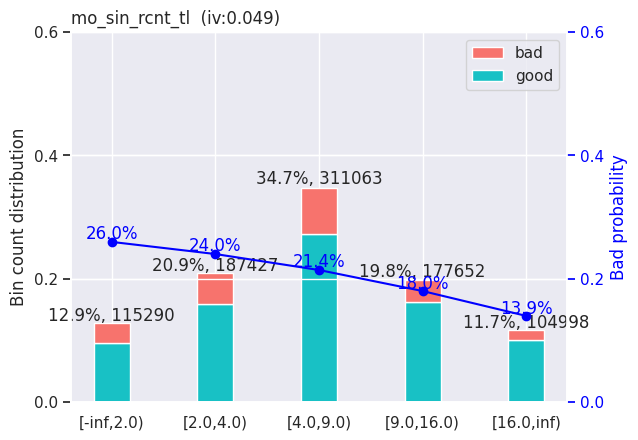

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sc.woebin_plot(bins)

In [17]:
train_last_19

num_il_tl  num_op_rev_tl  num_rev_accts  num_rev_tl_bal_gt_0  \
0              6.0           20.0           27.0                  5.0   
2              9.0            3.0            3.0                  2.0   
6              6.0           16.0           19.0                 13.0   
8              6.0            9.0           11.0                  9.0   
10             4.0            5.0            9.0                  4.0   
...            ...            ...            ...                  ...   
1280637       32.0            9.0           14.0                  3.0   
1280638        6.0            5.0            7.0                  4.0   
1280641        1.0           14.0           21.0                  8.0   
1280643       17.0           19.0           37.0                 12.0   
1280644        4.0            8.0           24.0                  7.0   

         num_sats  pct_tl_nvr_dlq  percent_bc_gt_75  pub_rec_bankruptcies  \
0            22.0            97.4               7.7                   0.0   
2             8.0            93.3               0.0                   0.0   
6            18.0           100.0              14.3                   1.0   
8            11.0            78.9               0.0                   0.0   
10            9.0            93.7              50.0                   0.0   
...           ...             ...               ...                   ...   
1280637      22.0           100.0              42.9                   0.0   
1280638       7.0           100.0              60.0                   0.0   
1280641      15.0           100.0               0.0                   0.0   
1280643      24.0            75.9              42.9                   0.0   
1280644      10.0            96.2              40.0                   1.0   

         tax_liens  tot_hi_cred_lim  total_bal_ex_mort  total_bc_limit  \
0              0.0         314017.0            39475.0         79300.0   
2              0.0         193390.0            27937.0         14500.0   
6              0.0          65819.0            36247.0         10300.0   
8              2.0         298100.0            31329.0        281300.0   
10             0.0         156354.0            22741.0          3800.0   
...            ...              ...                ...             ...   
1280637        0.0         411101.0           154430.0         31500.0   
1280638        0.0         324428.0           100548.0         81200.0   
1280641        2.0         128902.0            31320.0         93700.0   
1280643        1.0         227883.0           140118.0         27900.0   
1280644        0.0          84664.0            62426.0         20700.0   

         total_il_high_credit_limit  Default  coborrower_inc  bank_dlq  \
0                           24667.0      0.0             0.0       0.0   
2                           36144.0      0.0             0.0       0.0   
6                           31319.0      1.0             0.0       0.0   
8                           13400.0      0.0             0.0       1.0   
10                          36083.0      0.0             0.0       1.0   
...                             ...      ...             ...       ...   
1280637                    164626.0      0.0             0.0       0.0   
1280638                     55935.0      0.0             0.0       0.0   
1280641                     28602.0      0.0             0.0       0.0   
1280643                    172283.0      0.0             0.0       1.0   
1280644                     58764.0      1.0             0.0       0.0   

         il_acc  payment_history  collateral_coverage_ratio  
0           1.0         0.631895                   0.998664  
2           1.0         0.666333                   1.807200  
6           1.0         0.740741                   1.739944  
8           1.0         0.367947                   0.837500  
10          1.0         0.812000                   6.013833  
...         ...              ...                        .

In [61]:
bins = sc.woebin(after_outliers, y = 'Default', 
                min_perc_fine_bin=0.01, # How many bins to cut initially into
                min_perc_coarse_bin=0.02,  # Minimum percentage per final bin
                stop_limit=0.02, # Minimum information value 
                max_num_bin=10, # Maximum number of bins
                method='tree'
                )

[INFO] creating woe binning ...
Binning on 848276 rows and 20 columns in 00:01:36


{'percent_bc_gt_75': <Figure size 640x480 with 2 Axes>,
 'collateral_coverage_ratio': <Figure size 640x480 with 2 Axes>,
 'num_op_rev_tl': <Figure size 640x480 with 2 Axes>,
 'tot_hi_cred_lim': <Figure size 640x480 with 2 Axes>,
 'tax_liens': <Figure size 640x480 with 2 Axes>,
 'pct_tl_nvr_dlq': <Figure size 640x480 with 2 Axes>,
 'bank_dlq': <Figure size 640x480 with 2 Axes>,
 'num_rev_accts': <Figure size 640x480 with 2 Axes>,
 'coborrower_inc': <Figure size 640x480 with 2 Axes>,
 'pub_rec_bankruptcies': <Figure size 640x480 with 2 Axes>,
 'num_sats': <Figure size 640x480 with 2 Axes>,
 'total_il_hi_credit_limit': <Figure size 640x480 with 2 Axes>,
 'payment_history': <Figure size 640x480 with 2 Axes>,
 'num_rev_tl_bal_gt_0': <Figure size 640x480 with 2 Axes>,
 'il_acc': <Figure size 640x480 with 2 Axes>,
 'total_bal_ex_mort': <Figure size 640x480 with 2 Axes>,
 'total_bc_limit': <Figure size 640x480 with 2 Axes>,
 'num_il_tl': <Figure size 640x480 with 2 Axes>,
 'total_il_high_credi

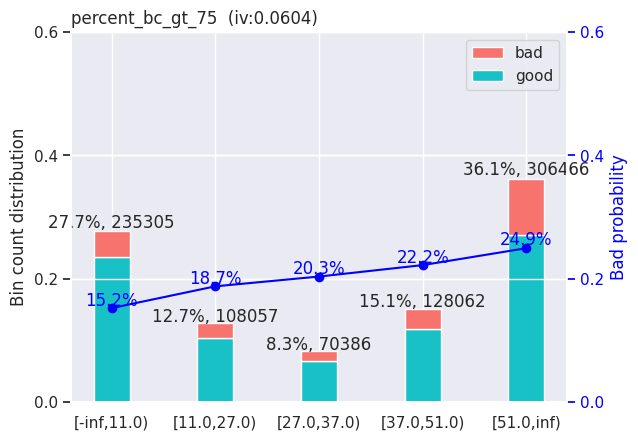

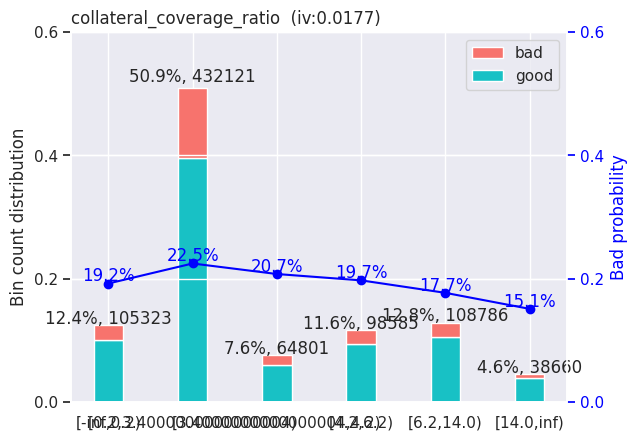

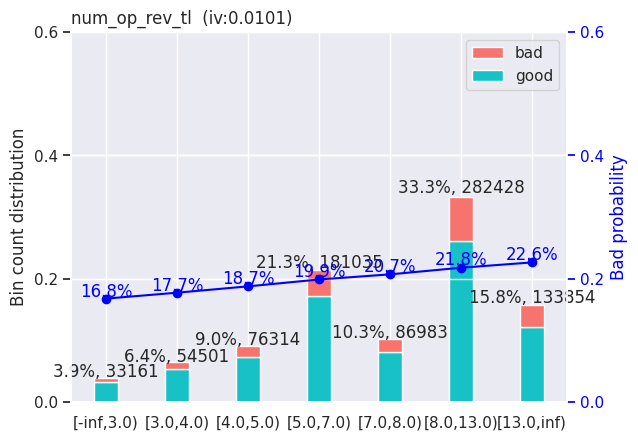

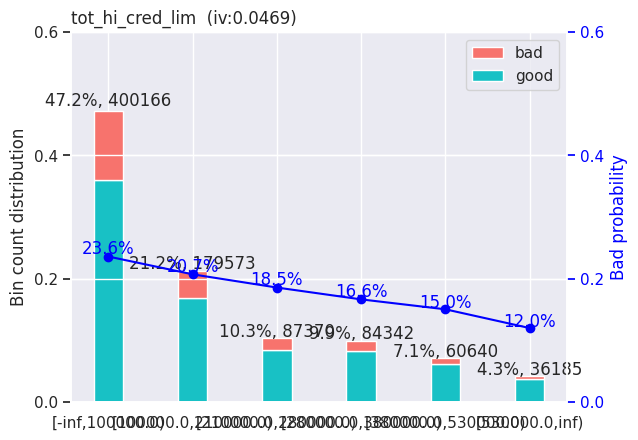

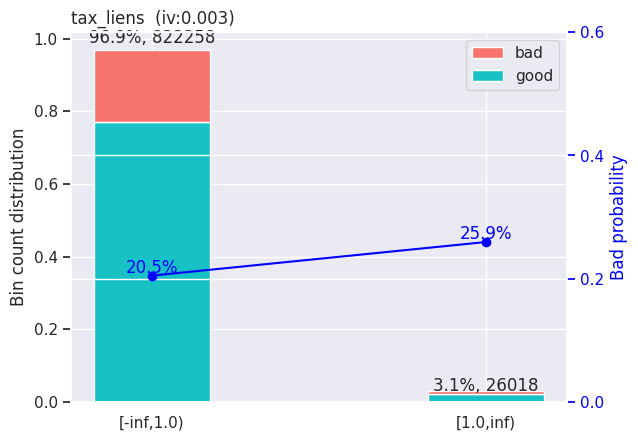

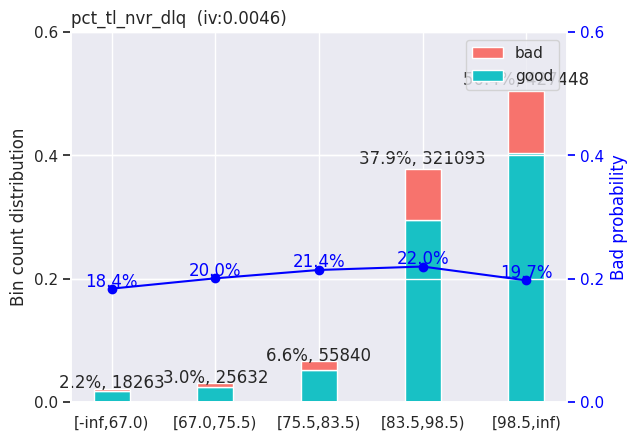

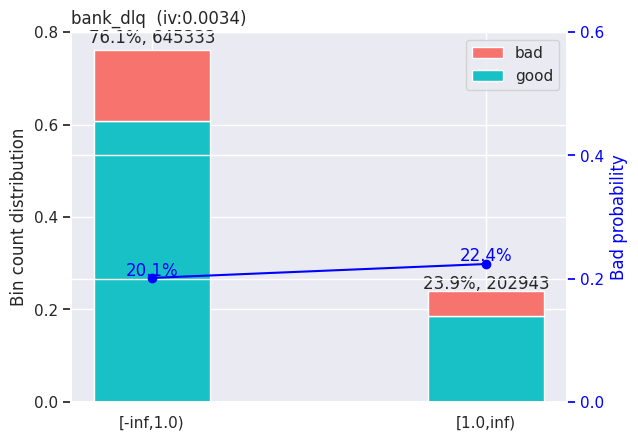

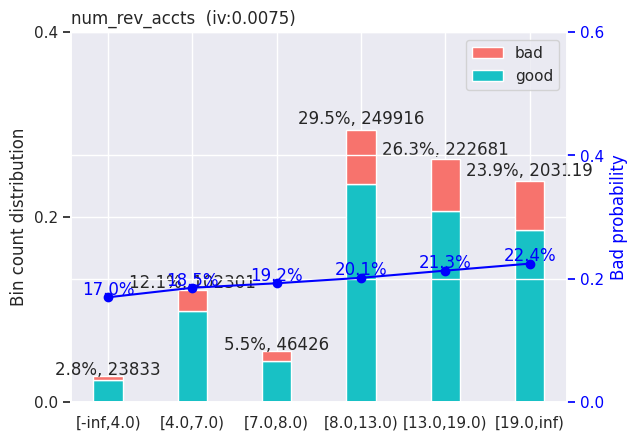

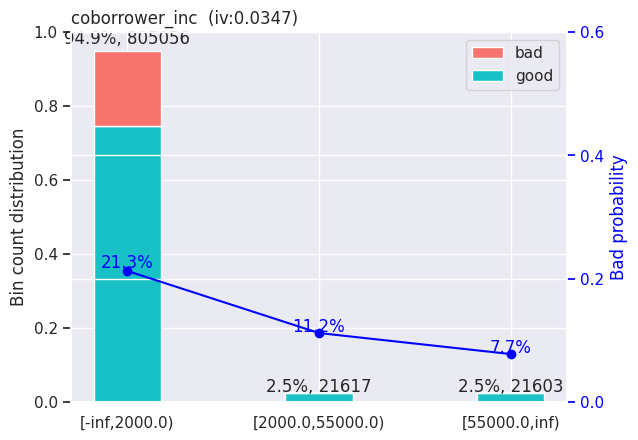

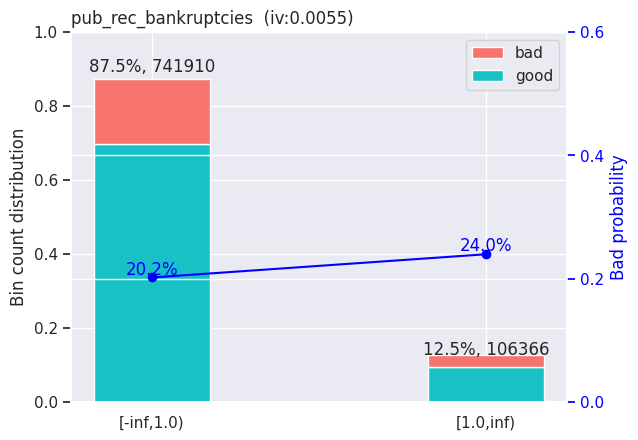

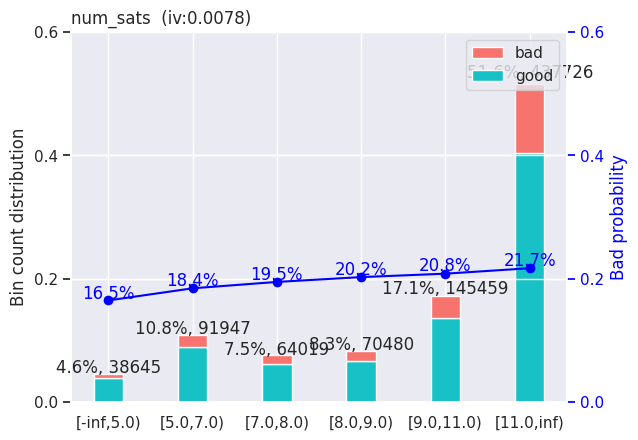

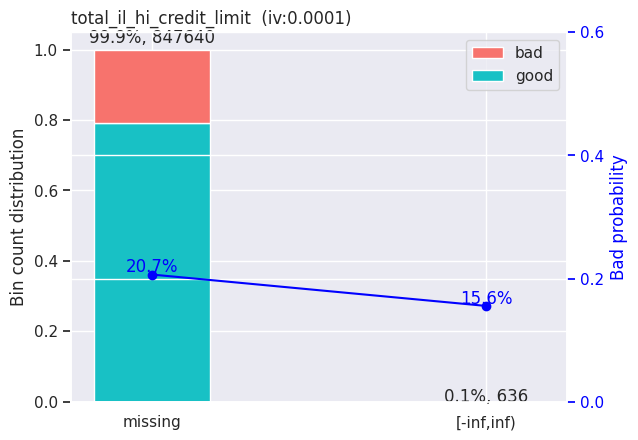

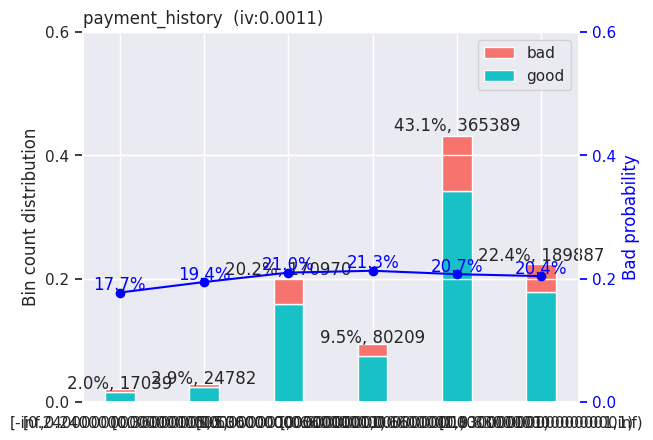

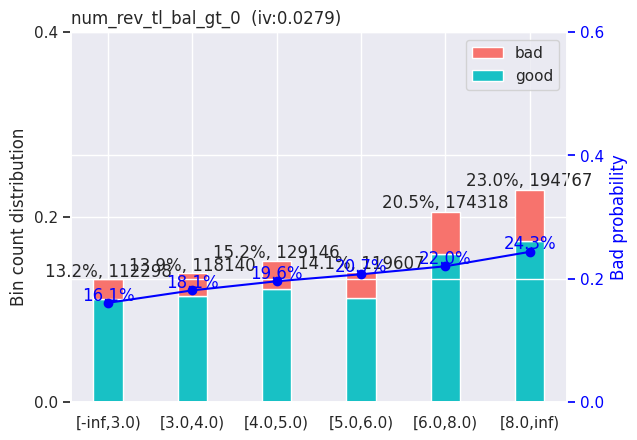

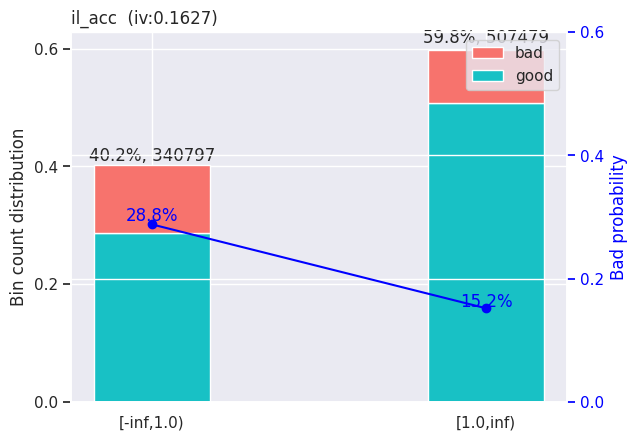

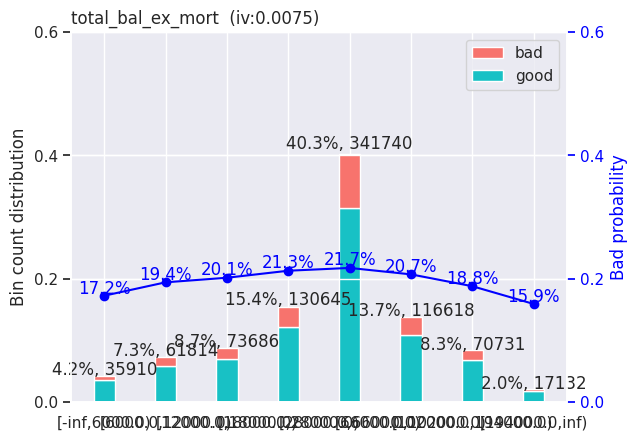

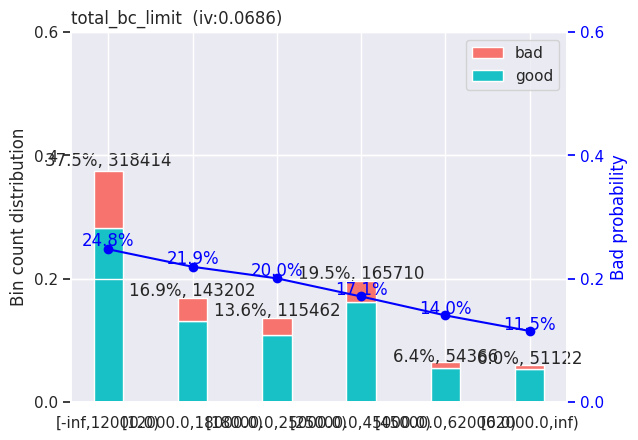

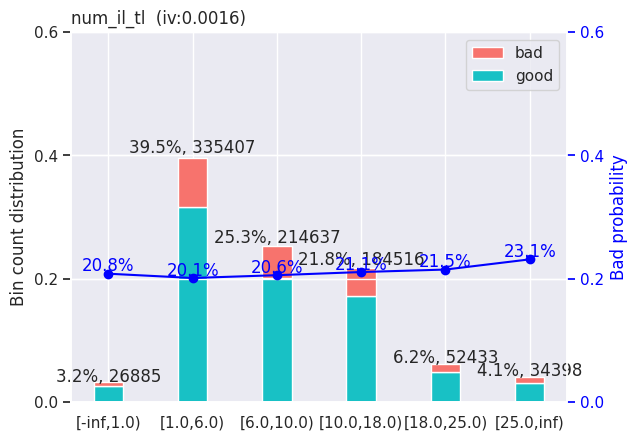

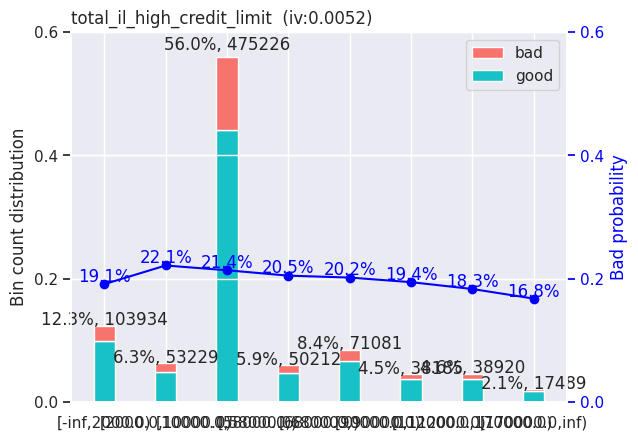

In [62]:
sc.woebin_plot(bins)

In [63]:
train_last_19.describe()

num_il_tl  num_op_rev_tl  num_rev_accts  num_rev_tl_bal_gt_0  \
count  848276.000000  848276.000000  848276.000000        848276.000000   
mean        8.411820       8.342334      14.115096             5.672452   
std         7.277492       4.649472       8.021599             3.307029   
min         0.000000       1.000000       1.000000             0.000000   
25%         3.000000       5.000000       8.000000             3.000000   
50%         6.000000       7.000000      13.000000             5.000000   
75%        11.000000      11.000000      18.000000             7.000000   
max        50.000000      35.000000      60.000000            30.000000   

            num_sats  pct_tl_nvr_dlq  percent_bc_gt_75  pub_rec_bankruptcies  \
count  848276.000000   848276.000000     848276.000000         848276.000000   
mean       11.721713       94.155011         43.085900              0.131890   
std         5.606109        8.823367         36.244562              0.357062   
min         1.000000       50.000000          0.000000              0.000000   
25%         8.000000       91.300000          0.000000              0.000000   
50%        11.000000      100.000000         40.000000              0.000000   
75%        15.000000      100.000000         75.000000              0.000000   
max        40.000000      100.000000        100.000000              2.000000   

           tax_liens  tot_hi_cred_lim  total_bal_ex_mort  total_bc_limit  \
count  848276.000000     8.482760e+05      848276.000000   848276.000000   
mean        0.049787     1.749588e+05       51139.936516    22994.094091   
std         0.362031     1.746171e+05       48843.869662    22330.562698   
min         0.000000     2.000000e+02           0.000000      100.000000   
25%         0.000000     5.018500e+04       21133.000000     8400.000000   
50%         0.000000     1.108250e+05       38113.000000    16100.000000   
75%         0.000000     2.529000e+05       64572.000000    29900.000000   
max        15.000000     1.800000e+06      600000.000000   200000.000000   

       total_il_high_credit_limit       Default  coborrower_inc  \
count                8.482760e+05  848276.00000   848276.000000   
mean                 4.364871e+04       0.20655     3181.053522   
std                  4.483017e+04       0.40483    16145.416153   
min                  0.000000e+00       0.00000        0.000000   
25%                  1.500000e+04       0.00000        0.000000   
50%                  3.269800e+04       0.00000        0.000000   
75%                  5.868000e+04       0.00000        0.000000   
max                  2.118996e+06       1.00000   200000.000000   

            bank_dlq         il_acc  payment_history  \
count  848276.000000  848276.000000    848276.000000   
mean        0.239242       0.598248         0.692899   
std         0.426621       0.490253         0.174655   
min         0.000000       0.000000        -0.300000   
25%         0.000000       0.000000         0.600000   
50%         0.000000       1.000000         0.727273   
75%         0.000000       1.000000         0.818485   
max         1.000000       1.000000         1.000000   

       collateral_coverage_ratio  total_il_hi_credit_limit  
count              848276.000000                     636.0  
mean                    4.009930                  400000.0  
std                     5.626465                       0.0  
min                     0.000000                  400000.0  
25%                     1.047400                  400000.0  
50%                     2.411282                  400000.0  
75%                     4.741500                  400000.0  
max                    50.000000                  400000.0

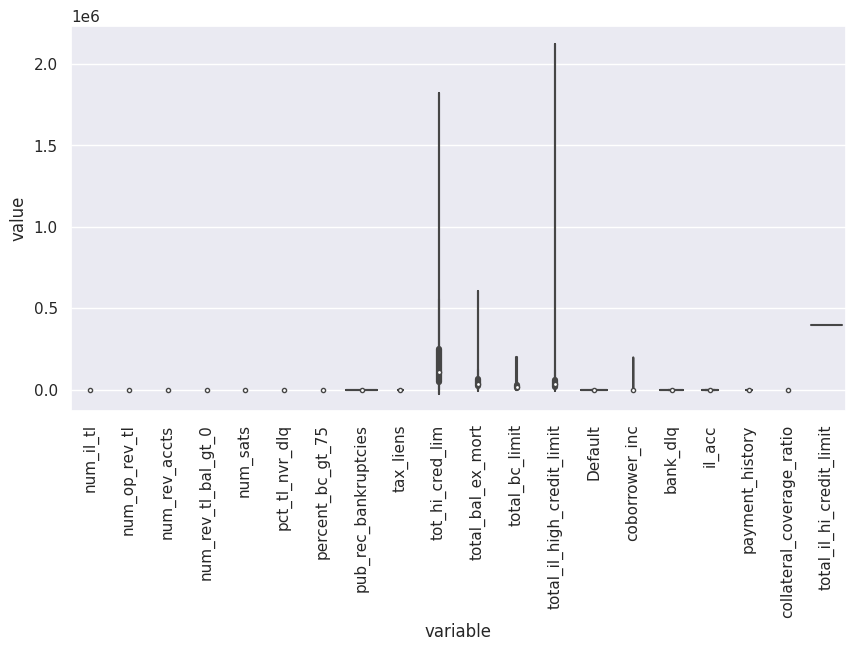

In [70]:
fig, ax = plt.subplots(figsize=(10,5))
a = sns.violinplot(x='variable', y='value', data=pd.melt(after_outliers), ax=ax)
a.set_xticklabels(a.get_xticklabels(), rotation=90);

In [80]:
from scipy.stats import zscore
train_last_19_norm = after_outliers.apply(zscore)

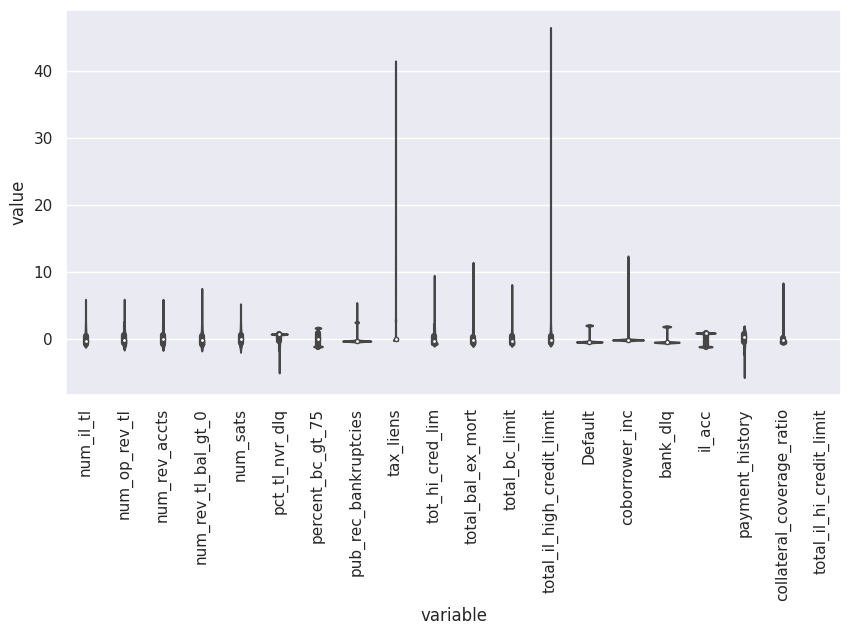

In [81]:
fig, ax = plt.subplots(figsize=(10,5))
a = sns.violinplot(x='variable', y='value', data=pd.melt(train_last_19_norm), ax=ax)
a.set_xticklabels(a.get_xticklabels(), rotation=90);

In [96]:
after_outliers.total_il_high_credit_limit.describe()

count    8.482760e+05
mean     4.364871e+04
std      4.483017e+04
min      0.000000e+00
25%      1.500000e+04
50%      3.269800e+04
75%      5.868000e+04
max      2.118996e+06
Name: total_il_high_credit_limit, dtype: float64

In [95]:
train_last_19_norm.total_il_high_credit_limit.describe()

count    8.482760e+05
mean    -3.370629e-17
std      1.000001e+00
min     -9.736463e-01
25%     -6.390500e-01
50%     -2.442711e-01
75%      3.352943e-01
max      4.629356e+01
Name: total_il_high_credit_limit, dtype: float64

In [77]:
after_outliers.tax_liens.value_counts()

0.0     822258
1.0      17602
2.0       4852
3.0       1822
4.0        826
5.0        371
6.0        228
7.0         94
8.0         78
10.0        38
9.0         36
15.0        34
11.0        16
12.0        12
13.0         8
14.0         1
Name: tax_liens, dtype: int64

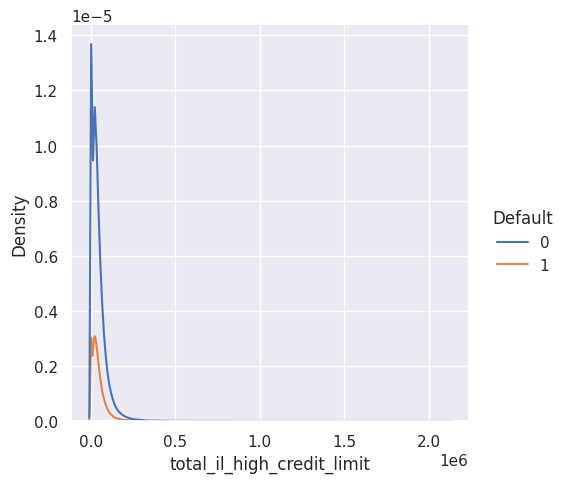

In [99]:
sns.displot(data = after_outliers, x = 'total_il_high_credit_limit', hue = "Default", kind = 'kde')